# Implement a KNN model to classify the animals in to categorie

In [24]:
# IMPORT THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
# load the data set 'ZOO.csv'
df = pd.read_csv('zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [26]:
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [27]:
df['catsize'].value_counts()

0    57
1    44
Name: catsize, dtype: int64

In [28]:
df['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [30]:
# Remove animal name from the data frame
df.drop('animal name',axis = 1, inplace = True)

In [31]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [32]:
df.describe().round(2)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.00,101.0,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00
mean,0.43,0.2,0.58,0.41,0.24,0.36,0.55,0.60,0.82,0.79,0.08,0.17,2.84,0.74,0.13,0.44,2.83
std,0.50,0.4,0.50,0.49,0.43,0.48,0.50,0.49,0.38,0.41,0.27,0.38,2.03,0.44,0.34,0.50,2.10
min,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,0.00,0.00,1.00
50%,0.00,0.0,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00,1.00,0.00,0.00,2.00
75%,1.00,0.0,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00,1.00,0.00,1.00,4.00
max,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,8.00,1.00,1.00,1.00,7.00


In [33]:
corel = df.corr().round(2)

In [34]:
corel

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.00,-0.43,-0.82,0.88,-0.20,-0.47,-0.15,0.49,0.19,0.44,-0.10,-0.28,0.39,0.05,0.21,0.46,-0.56
feathers,-0.43,1.00,0.42,-0.41,0.66,-0.06,-0.10,-0.61,0.23,0.25,-0.15,-0.22,-0.21,0.29,0.03,-0.14,-0.20
eggs,-0.82,0.42,1.00,-0.94,0.38,0.38,0.01,-0.64,-0.34,-0.38,0.10,0.16,-0.22,-0.22,-0.16,-0.51,0.66
milk,0.88,-0.41,-0.94,1.00,-0.37,-0.36,-0.03,0.63,0.38,0.42,-0.24,-0.16,0.21,0.21,0.16,0.57,-0.72
airborne,-0.20,0.66,0.38,-0.37,1.00,-0.17,-0.30,-0.59,-0.10,0.29,0.01,-0.25,0.04,0.01,0.06,-0.35,0.02
aquatic,-0.47,-0.06,0.38,-0.36,-0.17,1.00,0.38,0.05,0.02,-0.64,0.09,0.60,-0.36,-0.03,-0.22,-0.11,0.33
predator,-0.15,-0.10,0.01,-0.03,-0.30,0.38,1.00,0.13,0.05,-0.26,0.12,0.19,-0.10,0.02,-0.31,0.14,0.06
toothed,0.49,-0.61,-0.64,0.63,-0.59,0.05,0.13,1.00,0.58,-0.07,-0.06,0.36,-0.19,0.31,0.07,0.34,-0.47
backbone,0.19,0.23,-0.34,0.38,-0.10,0.02,0.05,0.58,1.00,0.21,-0.25,0.21,-0.43,0.73,0.10,0.36,-0.83
breathes,0.44,0.25,-0.38,0.42,0.29,-0.64,-0.26,-0.07,0.21,1.00,-0.12,-0.62,0.37,0.09,0.12,0.20,-0.52


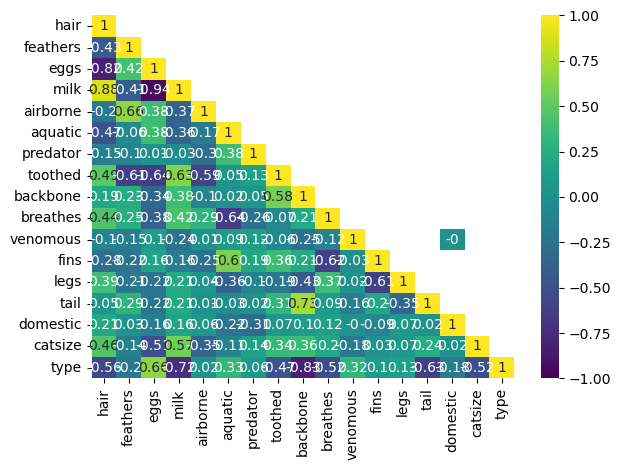

In [35]:
# visualization of correlation
sns.heatmap(data = corel,vmin = -1,vmax = +1,annot = True,cmap='viridis',mask = np.triu(corel,1));
plt.tight_layout()

# All the feature attributes are encoded into 0 and 1 except legs. So we will use encoding technique on legs attribute as well.

In [36]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [44]:
# Differentiate independent and target variables
x = df.drop('type',axis = 1)
y = df['type']

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [46]:
# import the required libraries
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [62]:
# create a range of odd values from 1 to 32 for k to try out and create a dictionery for store them
k = range(1,32,2)
param = {'n_neighbors':k}

In [63]:
# instantiate a Knearest classifier 
knn_gv = KNeighborsClassifier()

In [64]:
# create an instance of KNN model and Grid search cv and implement cross validation
kf = KFold(n_splits=10,shuffle=True,random_state=42)
gs_cv = GridSearchCV(knn_gv,param,cv = kf,scoring='accuracy')
gs_cv.fit(x,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 32, 2)}, scoring='accuracy')

In [65]:
# get the best parameters
gs_cv.best_params_

{'n_neighbors': 1}

In [66]:
# get the best model and predict the target and evaluate the model
gs_cv.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [69]:
# From the above the best ka value = 1

In [72]:
final_model = KNeighborsClassifier(n_neighbors=1)
final_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [74]:
pred_train = final_model.predict(x_train.values)

In [76]:
pred_test = final_model.predict(x_test.values)

In [77]:
pred_train

array([3, 1, 1, 2, 1, 1, 7, 1, 2, 7, 4, 4, 2, 4, 1, 1, 1, 5, 3, 1, 7, 6,
       1, 1, 4, 4, 2, 1, 1, 1, 6, 2, 2, 1, 1, 1, 7, 1, 4, 1, 3, 2, 2, 1,
       3, 2, 1, 1, 2, 2, 1, 7, 2, 1, 1, 5, 2, 4, 2, 2, 7, 1, 4, 4, 2, 4,
       2, 7, 4, 6], dtype=int64)

In [78]:
pred_test

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 3, 5,
       5, 6, 1, 7, 6, 7, 1, 1, 2], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy", accuracy_score(y_test,pred_test)*100)

Accuracy 100.0


In [81]:
final_model.score(x_train.values,y_train.values)

1.0

In [82]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         3

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



# With n_neighbours = 1 , The accuracy score is = 1 . The model is giving 100% accuracy on the test data